In [2]:
import torch 
from torchvision import datasets
import matplotlib.pyplot as plt
import sys 
import os
from PIL import Image

# ---- Preprocesing ----
import torchvision.transforms as transforms #Coleccion de funciones de procesamiento
from torch.utils.data import Dataset, DataLoader #Dataset lo import para heredar la clase, el DataLoader lo que hace es partir el dataset en batches de imagnes
from torchvision.utils import make_grid

# ---- NN ----
import torch.nn as nn
import torch.nn.functional as F # Capas sin parametros
import torch.optim as optim #Metodos de optimizacion
 



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/IA/data')

In [4]:
#from plot_helpers import imshow

# Introduction

In [ ]:
#cifar = datasets.CIFAR10('/content/drive/MyDrive/Colab Notebooks/IA/data', download=True)

In [ ]:
len(cifar)

In [ ]:
data.size()

## Cambiar de cpu a gpu

In [ ]:
data = torch.Tensor(cifar.data)
data.to(device)

In [ ]:
data.size()

## Capas de una red neuronal

---



In [6]:
Linear = nn.Linear(in_features=4096, out_features=10) # Tensores de 1 dimencion de entrada
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1, padding=1 ) #Esta red solo va a modificar la cantidad de canales
relu = nn.ReLU(False)

### Capa Lineal

In [ ]:
X = torch.randn(4096)
y = Linear(X)
y.size()

Ver los parametros

In [5]:
for name , p in list(Linear.named_parameters()):
    print(name)
    print( p.size())
    print()

NameError: name 'Linear' is not defined

### Capa Convolucional

In [ ]:
X = torch.randn([4096,3,32,32]) # 4096 imagenes de tres canales con un size de 32x32
y = conv(X)
y.size()

### RELU

In [ ]:
X = torch.randn([4096,3,32,32]) # 4096 imagenes de tres canales con un size de 32x32
y = relu(X)
y.size()
print('Original :\n\t',X[0][0][0],'\n\n','Resultado :\n\t',y[0][0][0])

# Caragar los datos

In [7]:
class SINGSDataset(Dataset):

  def __init__(self, base_dir, split= 'train', transform = None ):
    path = os.path.join(base_dir, '{}_signs'.format(split))   
    files = os.listdir(path)
    self.files_names = [os.path.join(path,f) for f in files if f.endswith('.jpg')]
    self.targets = [int(f[0]) for f in files if f.endswith('.jpg')]
    self.transform = transform

  def __len__(self):
    return len(self.files_names)
  
  def __getitem__(self, idx):
    image = Image.open(self.files_names[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]

In [8]:
base_dir = 'data/64x64_SIGNS'
train_set = SINGSDataset(base_dir, split='train', transform= transforms.ToTensor())

Como este es un dataset que no lo importamos desde torch, no tenía las funciones de len y getitem implementadas, por lo que tuvimo que implementarlas, y al crear la clase con herencia, ahora tiene los demás atributos

In [9]:
len(train_set)

864

In [10]:
train_set[0][0]

tensor([[[0.9294, 0.9255, 0.9137,  ..., 0.9059, 0.9059, 0.9059],
         [0.9294, 0.9216, 0.9098,  ..., 0.9059, 0.9059, 0.9059],
         [0.9255, 0.9216, 0.9098,  ..., 0.9059, 0.9059, 0.9059],
         ...,
         [0.8039, 0.8039, 0.8039,  ..., 0.8196, 0.8235, 0.8235],
         [0.7961, 0.7961, 0.7961,  ..., 0.8157, 0.8157, 0.8196],
         [0.7882, 0.7922, 0.7922,  ..., 0.8078, 0.8118, 0.8118]],

        [[0.8471, 0.8471, 0.8549,  ..., 0.8863, 0.8863, 0.8863],
         [0.8471, 0.8510, 0.8588,  ..., 0.8863, 0.8863, 0.8863],
         [0.8510, 0.8510, 0.8588,  ..., 0.8863, 0.8863, 0.8863],
         ...,
         [0.7725, 0.7725, 0.7725,  ..., 0.8039, 0.8078, 0.8078],
         [0.7647, 0.7647, 0.7647,  ..., 0.8000, 0.8000, 0.8039],
         [0.7608, 0.7608, 0.7608,  ..., 0.7922, 0.7961, 0.7961]],

        [[0.8431, 0.8431, 0.8353,  ..., 0.8627, 0.8627, 0.8627],
         [0.8431, 0.8353, 0.8353,  ..., 0.8627, 0.8627, 0.8627],
         [0.8353, 0.8353, 0.8353,  ..., 0.8627, 0.8627, 0.

# Preprocessing

---



In [11]:
dataloader = DataLoader(train_set, batch_size=32)

In [12]:
dataloader



Targets: tensor([1, 1, 4, 1, 4, 0, 4, 4, 3, 4, 1, 4, 0, 3, 2, 1, 5, 3, 5, 4, 3, 4, 5, 1,
        1, 1, 1, 2, 4, 3, 0, 5])


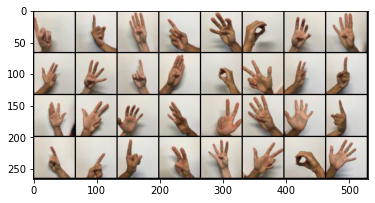

In [13]:
for input, target in dataloader:
  out = make_grid(input) #Crear una grilla
  image = out.permute(1,2,0)
  plt.imshow(image)
  print('\n\nTargets:',target)
  break

# Create the NN



In [25]:
class NN(nn.Module):
  def __init__(self,num_channels):
    super(NN,self).__init__()

    self.num_channels = num_channels
    
    #Capas convoluconales
    self.conv1 = nn.Conv2d(3, out_channels= self.num_channels, kernel_size= 3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(self.num_channels, out_channels= self.num_channels*2, kernel_size= 3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(self.num_channels*2, out_channels= self.num_channels*4, kernel_size= 3, stride=1, padding=1)
    
    # Capas lineales 
    self.lineal1 = nn.Linear(self.num_channels*4*8*8, out_features= self.num_channels*4)
    self.lineal2 = nn.Linear(self.num_channels*4 , out_features= 6)

  def forward(self,x):
      x = self.conv1(x) # num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x, 2)) #num_channels x 32 x 32
      x = self.conv2(x) # num_channels*2 x 32 x32
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*2 x 16 x 16
      x = self.conv3(x) #num_channels*4 x 16 x 16
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*4 x 8 x 8

      # flatten 
      x = x.view(-1, self.num_channels*4*8*8)
       
      # Aplicar las capas lineales 
      x = self.lineal1(x)
      x = F.relu(x)
      x = self.lineal2(x)
      x = F.log_softmax(x,dim=1)

      return x

In [15]:
class RunningMetrics():
  def __init__(self):
    self.S = 0
    self.N = 0
  
  def update(self, value, size):
    self.S += value
    self.N += size
  
  def __call__(self):
    return self.S/float(self.N)

In [26]:
net = NN(32).to(device)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [27]:
num_epoch = 100

for epoch in range(num_epoch):
    print('Epoch {}/{}'.format(epoch+1,num_epoch))
    print('---'*10)

    running_loss = RunningMetrics() #Calculaer la perdida 
    running_acc  = RunningMetrics() #Clacular el accuracy

    for inputs, target in dataloader:
        inputs, target = inputs.to(device), target.to(device) #Pasar los tensores a la gpu

        optimizer.zero_grad() #reiniciar los gradiantes a 0
        output = net(inputs)
        _, preds = torch.max(output,1)
        loss = loss_fn(output, target)

        loss.backward()
        optimizer.step()

        batch_size = inputs.size()[0]
        running_loss.update(loss.item()*batch_size, batch_size)
        running_acc.update(torch.sum(preds==target).float(), batch_size)

    print('Loss:{:.4f} Acc{:.4f}'.format(running_loss(),running_acc()))





Epoch 1/100
------------------------------
Loss:1.7936 Acc0.1690
Epoch 2/100
------------------------------
Loss:1.7921 Acc0.1690
Epoch 3/100
------------------------------
Loss:1.7910 Acc0.1690
Epoch 4/100
------------------------------
Loss:1.7902 Acc0.1690
Epoch 5/100
------------------------------
Loss:1.7896 Acc0.1690
Epoch 6/100
------------------------------
Loss:1.7889 Acc0.1782
Epoch 7/100
------------------------------
Loss:1.7882 Acc0.2153
Epoch 8/100
------------------------------
Loss:1.7875 Acc0.2338
Epoch 9/100
------------------------------
Loss:1.7867 Acc0.2477
Epoch 10/100
------------------------------
Loss:1.7857 Acc0.2523
Epoch 11/100
------------------------------
Loss:1.7847 Acc0.2535
Epoch 12/100
------------------------------
Loss:1.7836 Acc0.2512
Epoch 13/100
------------------------------
Loss:1.7823 Acc0.2512
Epoch 14/100
------------------------------
Loss:1.7808 Acc0.2650
Epoch 15/100
------------------------------
Loss:1.7790 Acc0.2812
Epoch 16/100
------

In [ ]:
for input, target in dataloader:
  input, target = input.to(device), target.to(device) #Pasar los tensores a la gpu
    
  optimizer.zero_grad() #reiniciar los gradiantes a 0
  output = net(input)
  _, preds = torch.max(output,1)
  loss = loss_fn(output, target)

  loss.backward()
  optimizer.step()

  batch_size = input.size()[0]
  running_loss.update(loss.item()*batch_size, batch_size)
  running_loss.update(torch.sum(preds==target).float(), batch_size)
  break